**Question 1 - Data Analysis**

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.pipeline as pipeline

from scipy.stats import entropy

from skimage import data
from skimage.color import rgb2hed, hed2rgb
from skimage.filters.rank import entropy as localEntropy
from skimage.morphology import disk
from skimage.transform import rescale
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR



#import torch
#import torchvision
#import torchvision.transforms as transforms
from tensorflow import keras
from tensorflow.keras import layers



In [2]:
#loading in the data
X = np.load("images.npy")#read images
Y = pd.read_csv('counts.csv')#read cell counts
F = np.loadtxt('split.txt')#read fold information

i. How many examples are there in each fold? [2 marks]

In [4]:
counts = []
for i in range(3):
    counts.append(np.count_nonzero(F == i+1))

In [5]:
print(counts)

[1622, 1751, 1608]


So, the number of examples in each fold are:
    
    Fold 1: 1622
    Fold 2: 1751
    Fold 3: 1608
    
    
For this coursework, we will be using the first fold for training, the second fold for validation, and the third fold for testing.

ii. Show some image examples using plt.imshow. Describe your observations on what you
see in the images and how it correlates with the cell counts of different types of cells
especially T3 cells. [2 marks]


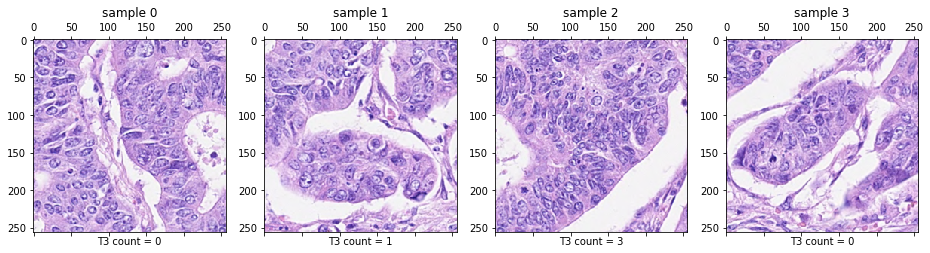

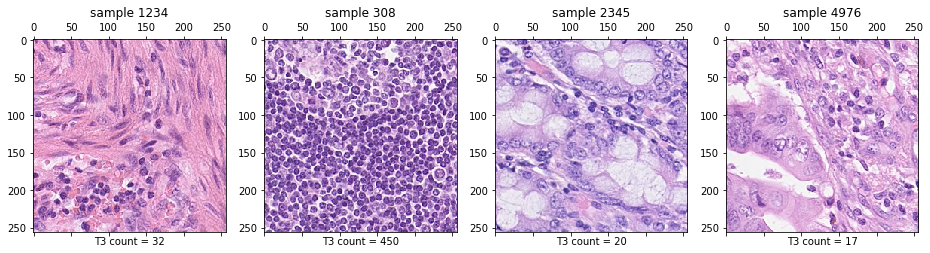

In [6]:
examples = [0,1,2,3]

plt.figure(figsize=(20, 50))
#just come simple plt matshow plots
for j,i in enumerate(examples):
    plt.subplot(2,5,j+1)
    plt.matshow(X[i],fignum=False)
    plt.title("sample "+str(i))
    plt.xlabel("T3 count = "+ str(Y.loc[i,:][2]))
plt.show()

examples = [1234,308,2345,4976]

plt.figure(figsize=(20, 50))

for j,i in enumerate(examples):
    plt.subplot(2,5,j+1)
    plt.matshow(X[i],fignum=False)
    plt.title("sample "+str(i))
    plt.xlabel("T3 count = "+ str(Y.loc[i,:][2]))
plt.show()

From the above examples, we get a very good idea of how the images correlate to T3 count. We figure out that T3 count correlates to the dark blue/purple solid colour circles that appear on the images. Each one of these contributes one for the amount of T3 cells, some good examples of this are samples 0 and 3, which have no T3 cells, samples 7 and 17, where we can count the amount of the blue circles, and these will match with the T3 count, and then sample 308, where we can see a very large number of these blue circles, and then a matchingly very large T3 count (450).

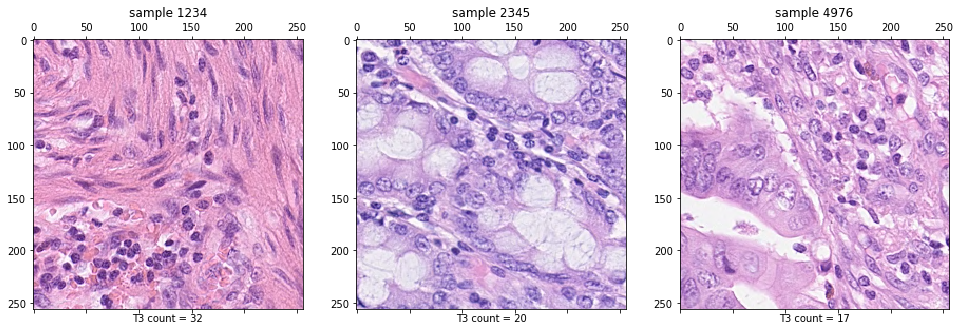

In [7]:
examples = [1234,2345,4976]

plt.figure(figsize=(28, 20))

for j,i in enumerate(examples):
    plt.subplot(2,5,j+1)
    plt.matshow(X[i],fignum=False)
    plt.title("sample "+str(i))
    plt.xlabel("T3 count = "+ str(Y.loc[i,:][2]))
plt.show()


In [8]:
print(Y.loc[1234,:])
print()
print(Y.loc[2345,:])
print()
print(Y.loc[4976,:])

neutrophil     0
epithelial     0
lymphocyte    32
plasma         8
eosinophil     1
connective    81
Name: 1234, dtype: int64

neutrophil     0
epithelial    57
lymphocyte    20
plasma         5
eosinophil     0
connective    15
Name: 2345, dtype: int64

neutrophil     0
epithelial    22
lymphocyte    17
plasma         8
eosinophil     2
connective    50
Name: 4976, dtype: int64


We can also see, by comparing the above samples, and by looking at the rest of the images, that the epithelial cells are the more transparent, oblong cells, and the connective cells are the more oblong, sausage like, light purple ones.

iii. For each fold, plot the histogram of counts of each cell type separately (6 plots in total). How
many images have counts within each of the following bins? [4 marks]

In [10]:
#These indexes are boolean maps for each fold/split
index1 = F==1
index2 = F==2
index3 = F==3

In [11]:
#we can create each fold by subsetting off the respective boolean map
X1 = X[index1]
X2 = X[index2]
X3 = X[index3]
Xfolds = [X1,X2,X3]

In [12]:
Y1 = Y.loc[index1]
Y2 = Y.loc[index2]
Y3 = Y.loc[index3]
Yfolds = [Y1,Y2,Y3]

Fold  1


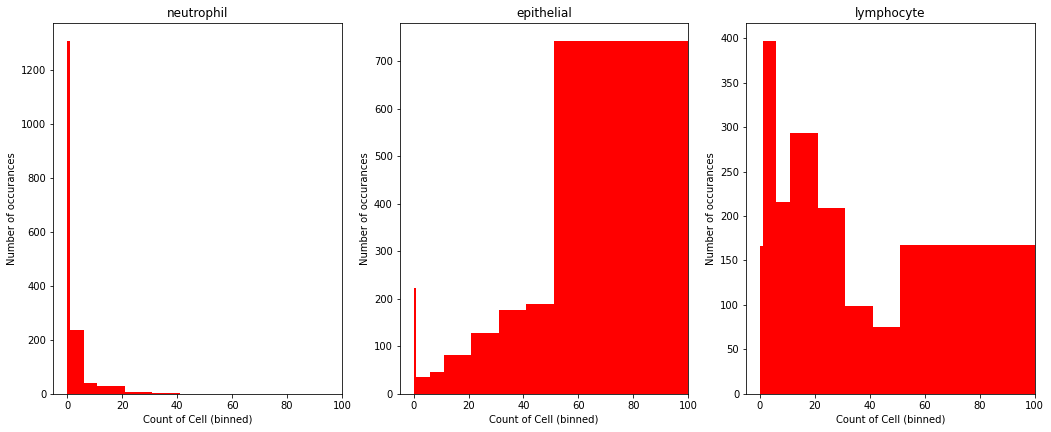

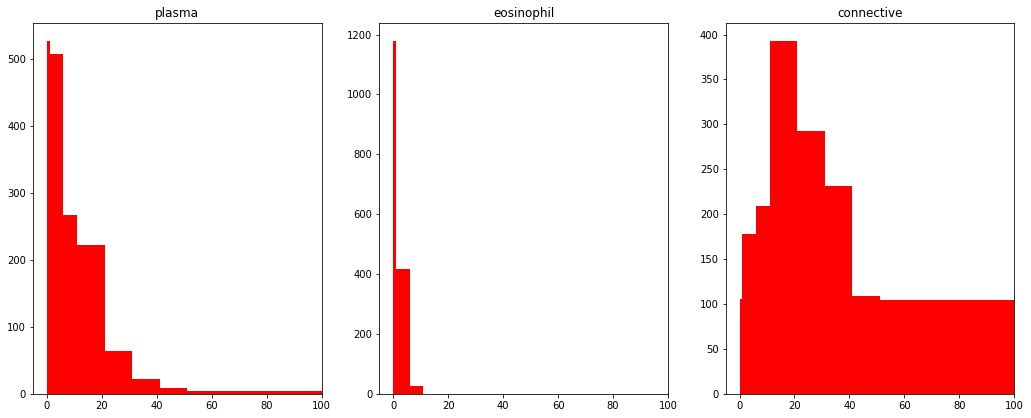

Fold  2


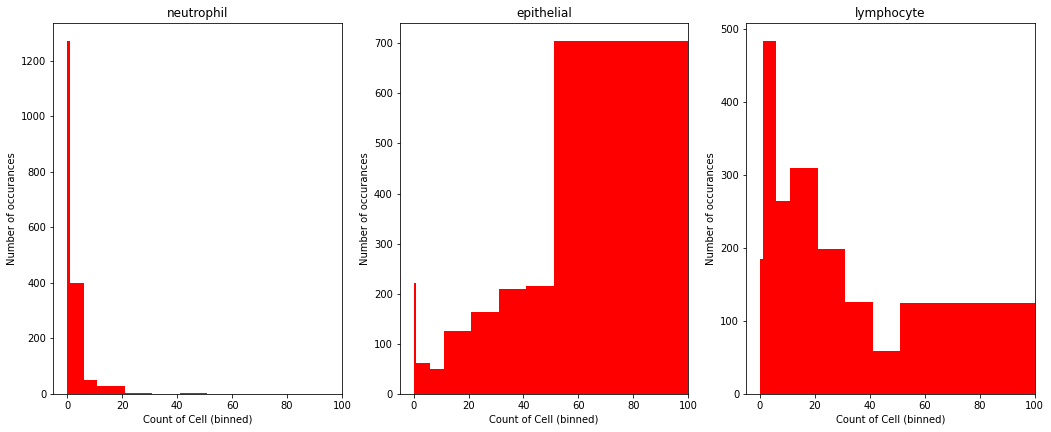

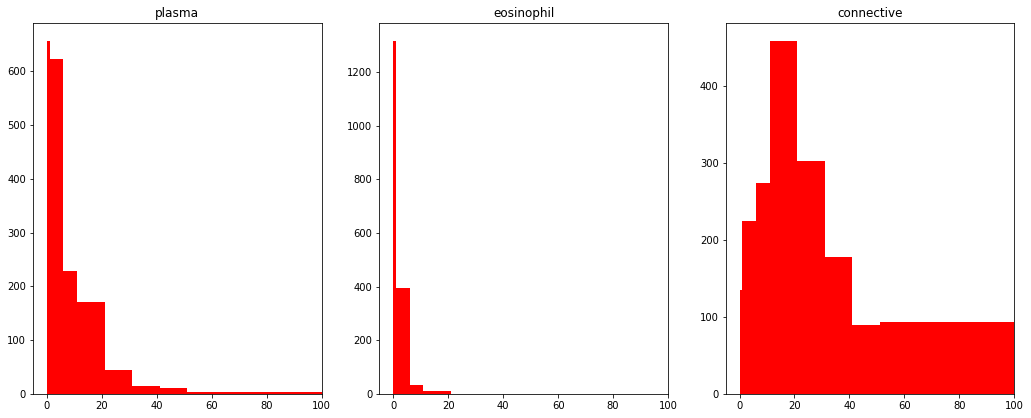

Fold  3


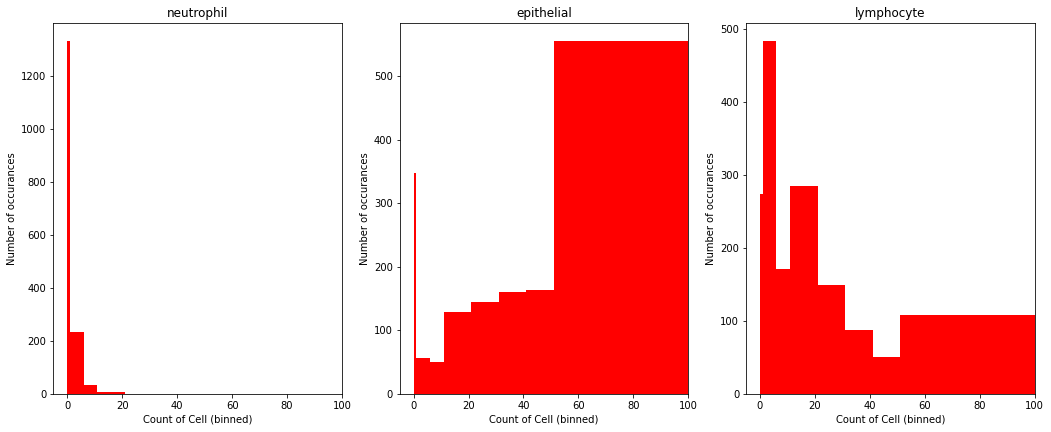

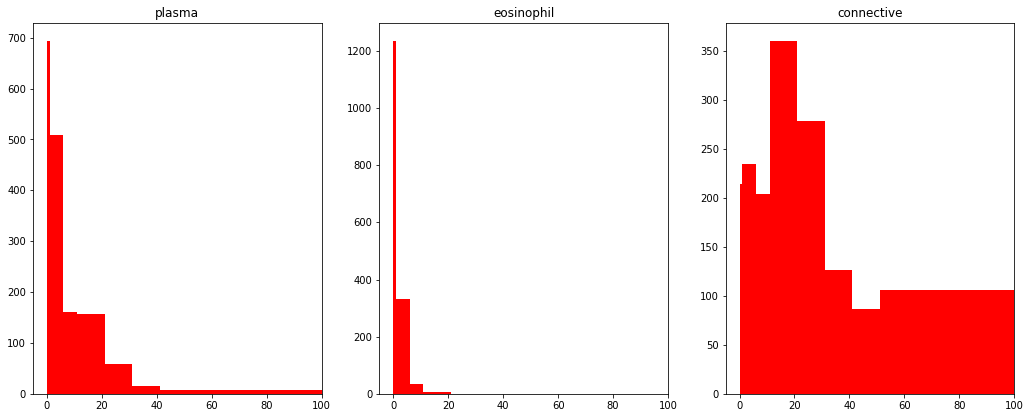

In [23]:
output = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for k,fold in enumerate(Yfolds):
    print("Fold ", k+1)
    bins = [0,1,6,11,21,31,41,51,500]
    plt.figure(figsize=(30, 15))
    examples = ["neutrophil",  "epithelial",  "lymphocyte" ]
    for j,i in enumerate(examples):
        plt.subplot(2,5,j+1)
        n,b,p = plt.hist(fold.loc[:,i],bins = [0,1,6,11,21,31,41,51,500],align = 'mid', color = 'r', rwidth = 1)
        output[j+6*k] = n
        plt.xlim([-5,100])
        plt.xlabel("Count of Cell (binned)")
        plt.ylabel("Number of occurances")
        plt.title(i)

    plt.show()

    examples = ["plasma",  "eosinophil",  "connective"]

    plt.figure(figsize=(30, 15))    
    for j,i in enumerate(examples):
        plt.subplot(2,5,j+1)
        n,b,p =plt.hist(fold.loc[:,i],bins = [0,1,6,11,21,31,41,51,500],align = 'mid', color = 'r', rwidth = 1)
        output[j+3+6*k] = n
        plt.xlim([-5,100])
        plt.title(i)

    plt.show()



In [12]:
prettyOutput = pd.DataFrame(output, columns=["0","1-5","6-10","11-20","21-20","31-40","41-50",">50"])
rows = []
for i in range(3):
    for name in Y.columns:
        rows.append("Fold "+ str(i+1) + " " + name)
prettyOutput.index = rows

The full data of counts in each bin can be seen below:

In [13]:
print(prettyOutput)

                        0    1-5   6-10  11-20  21-20  31-40  41-50    >50
Fold 1 neutrophil  1308.0  235.0   40.0   28.0    7.0    3.0    1.0    0.0
Fold 1 epithelial   223.0   35.0   46.0   82.0  127.0  176.0  190.0  743.0
Fold 1 lymphocyte   166.0  397.0  216.0  293.0  209.0   99.0   75.0  167.0
Fold 1 plasma       527.0  508.0  267.0  222.0   64.0   22.0    8.0    4.0
Fold 1 eosinophil  1179.0  417.0   25.0    1.0    0.0    0.0    0.0    0.0
Fold 1 connective   105.0  178.0  209.0  393.0  293.0  231.0  109.0  104.0
Fold 2 neutrophil  1271.0  398.0   48.0   28.0    3.0    0.0    3.0    0.0
Fold 2 epithelial   221.0   62.0   49.0  125.0  164.0  210.0  215.0  705.0
Fold 2 lymphocyte   185.0  484.0  265.0  310.0  198.0  126.0   59.0  124.0
Fold 2 plasma       657.0  623.0  228.0  171.0   44.0   14.0   10.0    4.0
Fold 2 eosinophil  1316.0  394.0   31.0    9.0    1.0    0.0    0.0    0.0
Fold 2 connective   135.0  224.0  273.0  458.0  302.0  177.0   89.0   93.0
Fold 3 neutrophil  1333.0

iv. Pre-processing: Convert and show a few images from RGB space to HED space and show the
H-channel which should indicate cellular nuclei. [5 marks]

In [14]:
#function that plots the rgb of an image, the h channel (in rgb) and the H channel (raw)
def hedPlot(rgb):
    # Separate the stains from the image
    hed = rgb2hed(rgb)
    
    # Create an RGB image for each of the stains
    null = np.zeros_like(hed[:, :, 0])
    h = hed2rgb(np.stack((hed[:, :, 0], null, null), axis=-1))
    e = hed2rgb(np.stack((null, hed[:, :, 1], null), axis=-1))
    d = hed2rgb(np.stack((null, null, hed[:, :, 2]), axis=-1))
    
    # Display
    fig, axes = plt.subplots(1, 3, figsize=(15, 9), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(rgb)
    ax[0].set_title("Original image")

    ax[1].imshow(h)
    ax[1].set_title("Hematoxylin (shown in RGB)")
    
    ax[2].imshow(hed[:,:,0])
    ax[2].set_title("Hematoxylin (H-channel)")

#     ax[2].imshow(e)
#     ax[2].set_title("Eosin")  

#     ax[3].imshow(d)
#     ax[3].set_title("DAB")
    
    for a in ax.ravel():
        a.axis('off')

    fig.tight_layout()
    plt.show()

sample 0


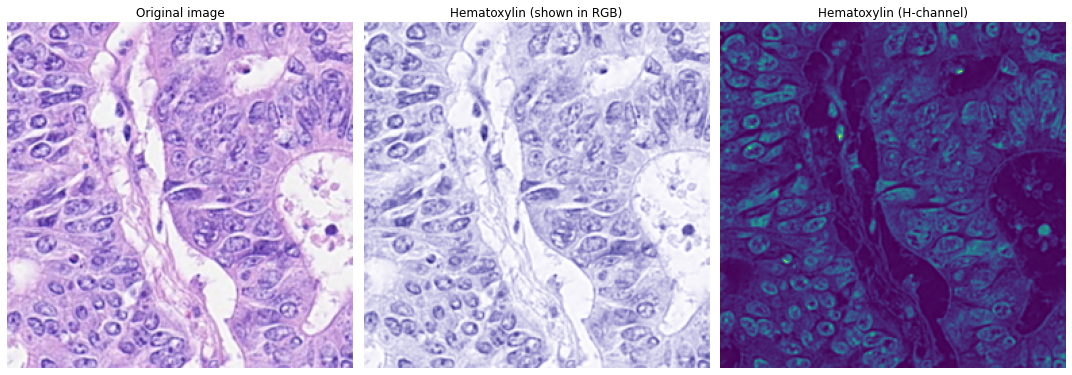

sample 1


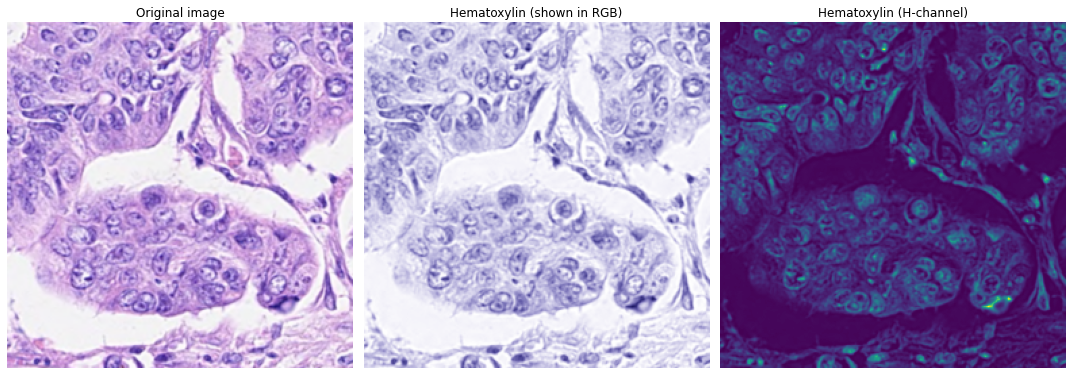

sample 2


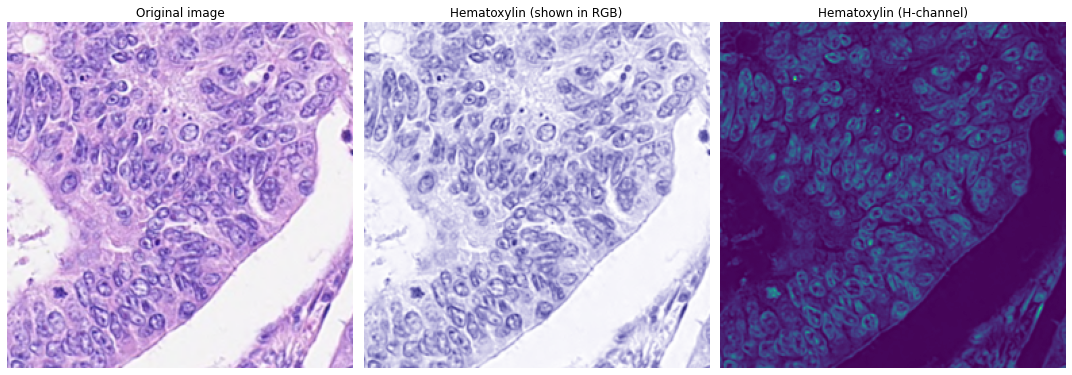

sample 308


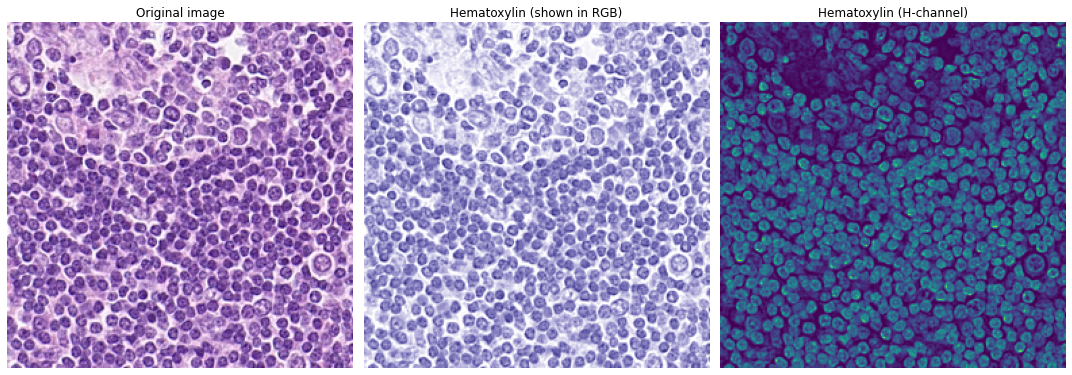

In [15]:
examples = [0,1,2,308]

for i in examples:
    print("sample "+str(i))
    hedPlot(X[i])    
    
# for j,i in enumerate(convertedExamples):
#     plt.subplot(2,5,j+1)
#     plt.matshow(i,fignum=False)
#     plt.title("sample "+str(examples[j]))
# plt.show()

v. Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain
type for images in Fold-1 (6 plots in total). Do you think this feature would be useful in your
regression model? Explain your reasoning. [4 marks]

In [16]:
def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None or len(conts)<2:
            #conts = list(classes)
            vmin,vmax = classes[0]-eps,classes[-1]+eps
        else:            
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None or len(conts)<2:            
            conts = sorted([-1+eps,0,1-eps])
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = 'x',c = cc, s = 50)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = 'x', c = 'b', s = 4, alpha = 0.5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

In [13]:
#returns the h channel of an image
def hChannel(rgb):
    hed = rgb2hed(rgb)
    h=hed[..., 0]
    return h

In [14]:
H1 = hChannel(X1)
R1 = X1[...,0]
G1 = X1[...,1]
B1 = X1[...,2]

In [19]:
print(X1.shape)
print(R1.shape)
print(H1.shape)

(1622, 256, 256, 3)
(1622, 256, 256)
(1622, 256, 256)


In [20]:
#calculating means
means = np.apply_over_axes(np.mean,H1,[1,2])


In [21]:
print(means.shape)
print(Y1.loc[:,"epithelial"].shape)

(1622, 1, 1)
(1622,)


In [22]:
#reshaping means so they can be plotted nicely
means = np.reshape(means, Y1.loc[:,"epithelial"].shape)

H-Channel mean VS neutrophil count


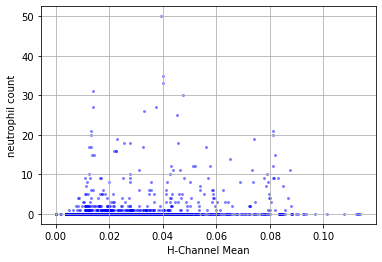

H-Channel mean VS epithelial count


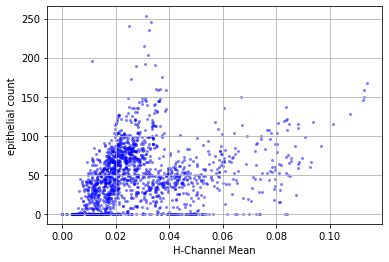

H-Channel mean VS lymphocyte count


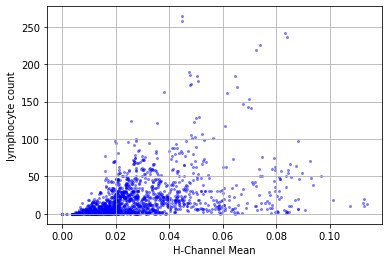

H-Channel mean VS plasma count


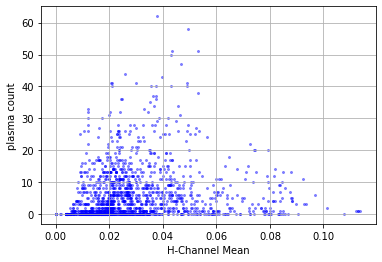

H-Channel mean VS eosinophil count


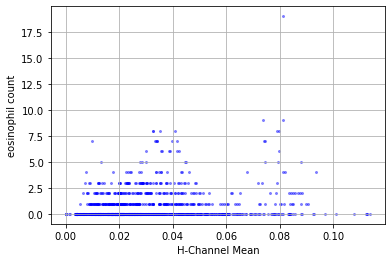

H-Channel mean VS connective count


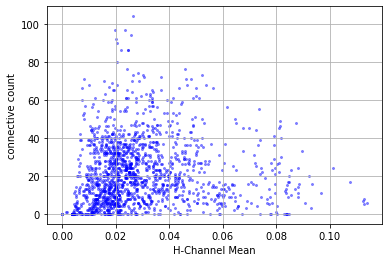

In [23]:


for j,name in enumerate(Y.columns):#
    print("H-Channel mean VS " + name + " count")

    a = plotit(np.column_stack((means, Y1.loc[:,name])),hold=True)
    plt.xlabel("H-Channel Mean")
    plt.ylabel(name + " count")
    plt.grid()
    plt.show()

From these scatters, we can conclude that this feature WILL be useful in our regression model, because it seems to have some sort of correlation with counts, and from our plots, we can see that it can very easily distinguish nuclei, which we were using to identify T3 cells, so we can assume that this feature will be very useful in identifying T3 cels.

vi. What performance metrics can you use for this problem? Which one will be the best
performance metric for this problem? Please give reasoning. [3 marks]


One performance metric we can use is the distance we are from the correct number of counts, versus the predicted count. Depending on our model, we can choose varying different distance metrics to use. Euclidian distance would probably work quite well, because we don't really care if we are only slightly off from the correct count, but if we are far off, we care quite a bit. This is effectively RMSE.

Another performance metric we can use is the R2 score metric. We can also use the RMSE, Pearson Correlation Coeeficient and Spearman Correlation Coefficient. We are probably best off using RMSE, or R2 as our performance metric, since we will essentially be making a regression in each of our models, so R2 score is ideal, but also RMSE can work, because we want to disincetivise being VERY far away from the results.

**Question No. 2: (Feature Extraction and Classical Regression) [40 Marks]**

In [15]:
#takes vectors of 256*256 and returns their means
def averageOfChannel(channel):
    #we were using the np.apply_over_axes to apply mean onto the 1 and 2 axis, but it was being inconsistent and weird
    #aOC =   np.apply_over_axes(np.mean,channel,[1,2])
    aOC = np.mean(channel, axis = (1,2))
    return np.reshape(aOC,aOC.shape[0])

In [16]:
avgR1 = averageOfChannel(R1)
avgG1 = averageOfChannel(G1)
avgB1 = averageOfChannel(B1)
avgH1 = averageOfChannel(H1)

In [17]:
#takes vectors of 256*256 and returns their variances
def varianceOfChannel(channel):
    #we were using the np.apply_over_axes to apply var onto the 1 and 2 axis, but it was being inconsistent and weird
    #vOC =  np.apply_over_axes(np.var,channel,[1,2])
    vOC =  np.var(channel,axis = (1,2))
    return np.reshape(vOC,vOC.shape[0])

In [18]:
varR1 = varianceOfChannel(R1)
varG1 = varianceOfChannel(G1)
varB1 = varianceOfChannel(B1)
varH1 = varianceOfChannel(H1)

In [19]:
#takes a data point and converts it into a probability distribution
def probDist(x, axis=[1]):
    l = lambda x: np.array(np.histogram(x,bins = 256)[0])/(256**2)
    return l(x)


#takes a vector of 256*256 and returns their variance
def entropyOfChannel(channel):
    return np.apply_along_axis(entropy,1,channel)

In [20]:
#convert the channels into 256**2 so we can calculate prob distribution
tempR1 = R1.reshape(R1.shape[0],256**2)
tempG1 = G1.reshape(G1.shape[0],256**2)
tempB1 = B1.reshape(B1.shape[0],256**2)
tempH1 = H1.reshape(H1.shape[0],256**2)

In [21]:
#get the probability distributions of the channels
probR1 = np.apply_along_axis(probDist,1,tempR1)
probG1 = np.apply_along_axis(probDist,1,tempG1)
probB1 = np.apply_along_axis(probDist,1,tempB1)
probH1 = np.apply_along_axis(probDist,1,tempH1)

In [22]:
#calculates entropy from the probability distribution
entR1 = entropyOfChannel(probR1)
entG1 = entropyOfChannel(probG1)
entB1 = entropyOfChannel(probB1)
entH1 = entropyOfChannel(probH1)

In [23]:
potentialFeatures = [avgR1,avgG1,avgB1,avgH1,
                    varR1,varG1,varB1,varH1,
                    entR1,entG1,entB1,entH1]

In [25]:
correlationCoefficients = {}

Here, we define a function that will remove any outliers from our channels, and we tweak with our value for k until we maximise the correlation coefficients of all of our combinations of channels

In [34]:
# we remove outliers so that we can get a better assessment of each feature's correlation coeeficient with the bulk of the data
# it was an interesting idea, so I left the code in to see, but doesn't end up being used.
def outliers(channel,k):
    outlier = abs(channel - np.mean(channel)) > k * np.std(channel)
    return outlier

In [4]:

def featureAnalysis(feature,featureName):


    plt.scatter(feature,Y1.loc[:,"lymphocyte"], s=4 , alpha = 0.5)
    plt.plot(np.unique(feature), np.poly1d(np.polyfit(feature, Y1.loc[:,"lymphocyte"], 1))(np.unique(feature)),color = 'r')
    plt.xlabel(featureName)
    plt.ylabel("T3 count")
    plt.grid()
    corCoef = np.corrcoef(feature, Y1.loc[:,"lymphocyte"])
    print(featureName + " Correlation Coeeficient is :" + str(corCoef[0][1]))
    correlationCoefficients[featureName] = corCoef[0][1]
    print(corCoef)
  
      #old code using outliers:
#     k = 1.43
#     inliers = ~outliers(feature,k)
#     plt.scatter(feature[inliers],Y1.loc[:,"lymphocyte"][inliers], s=4 , alpha = 0.5)
#     plt.plot(np.unique(feature[inliers]), np.poly1d(np.polyfit(feature[inliers], Y1.loc[:,"lymphocyte"][inliers], 1))(np.unique(feature[inliers])),color = 'r')
#     plt.xlabel(featureName)
#     plt.ylabel("T3 count")
#     plt.grid()
#     corCoef = np.corrcoef(feature[inliers], Y1.loc[:,"lymphocyte"][inliers])
#     print(featureName + " Correlation Coeeficient is :" + str(corCoef[0][1]))
#     correlationCoefficients[featureName] = corCoef[0][1]
#     print(corCoef)

In [36]:
gridResults = {}
for k in np.linspace(0.1,5,500):
    k = round(k,2)
    averageCorrelationCoefficient = 0
    for feature in potentialFeatures:
        averageCorrelationCoefficient += abs(np.corrcoef(feature[~outliers(feature,k)],Y1.loc[:,"lymphocyte"][~outliers(feature,k)])[0][1])
    averageCorrelationCoefficient = averageCorrelationCoefficient / len(potentialFeatures)
    gridResults[k] = averageCorrelationCoefficient

In [37]:
for k in gridResults:
    print(k,gridResults[k])

0.1 0.10859308549198975
0.11 0.11749844783436554
0.12 0.115567034062659
0.13 0.12707067455431256
0.14 0.14056211612418007
0.15 0.1490329080435279
0.16 0.14778807996820004
0.17 0.16079201791469636
0.18 0.16656024026047406
0.19 0.16353262777653285
0.2 0.16834832836800676
0.21 0.17109839601130414
0.22 0.17366083202267288
0.23 0.17712572259329104
0.24 0.16819720327672225
0.25 0.17128690782423037
0.26 0.17983980747566528
0.27 0.18093509811952438
0.28 0.1717578998960191
0.29 0.18145987193714944
0.3 0.18277738309049554
0.31 0.1843882902999077
0.32 0.18615518804630657
0.33 0.189148459765635
0.34 0.19005236568518372
0.35 0.19097604490923914
0.36 0.19436724707534736
0.37 0.20044220110183267
0.38 0.20381309507562137
0.39 0.20904889065537777
0.4 0.214799706995518
0.41 0.2144876594603331
0.42 0.21818548984124278
0.43 0.22226785388096168
0.44 0.22225508878605352
0.45 0.22651656142730806
0.46 0.2274755879205874
0.47 0.22993080989612166
0.48 0.23063665960467306
0.49 0.23294982101396922
0.5 0.234633874

In [38]:
print(max(gridResults, key=gridResults.get))

1.43


From this, we find that the optimal value for k is 1.43

In [39]:
print(X1.shape)
print(X1[:,:,:,0].shape)
print(averageOfChannel(X1[:,:,:,0]).shape)
print(averageOfChannel(X1[:,:,:,0]))
print(Y1.loc[:,"lymphocyte"].shape)

(1622, 256, 256, 3)
(1622, 256, 256)
(1622,)
[216.82820129 210.43247986 203.08444214 ... 225.16647339 204.53013611
 204.04139709]
(1622,)


Average of Red Channel Correlation Coeeficient is :-0.40026428641779555
[[ 1.         -0.40026429]
 [-0.40026429  1.        ]]
Variance of Red Channel Correlation Coeeficient is :0.4393054876758353
[[1.         0.43930549]
 [0.43930549 1.        ]]
Entropy of Red Channel Correlation Coeeficient is :0.34045761117501105
[[1.         0.34045761]
 [0.34045761 1.        ]]


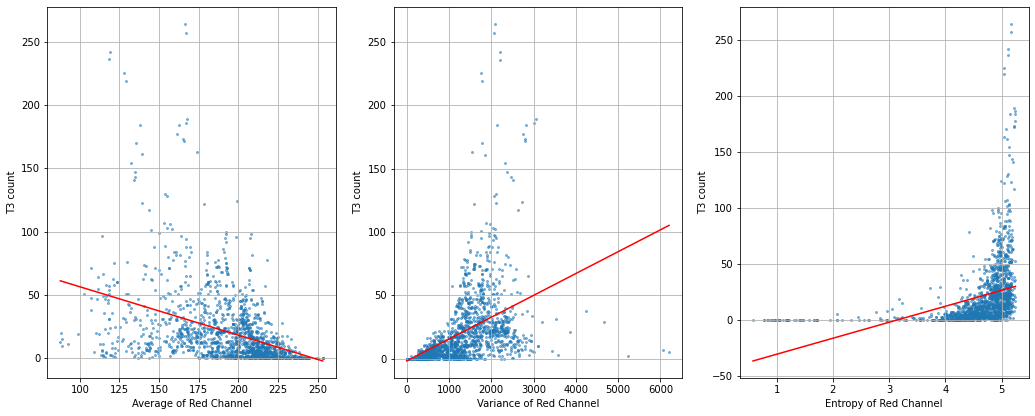

Average of Green Channel Correlation Coeeficient is :-0.4479125711631822
[[ 1.         -0.44791257]
 [-0.44791257  1.        ]]
Variance of Green Channel Correlation Coeeficient is :0.14581803268671045
[[1.         0.14581803]
 [0.14581803 1.        ]]
Entropy of Green Channel Correlation Coeeficient is :0.2437916319542139
[[1.         0.24379163]
 [0.24379163 1.        ]]


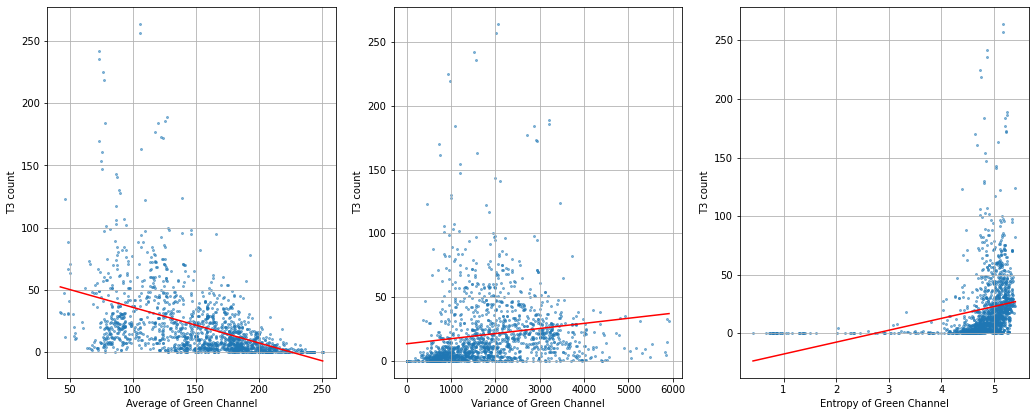

Average of Blue Channel Correlation Coeeficient is :-0.4067679033256337
[[ 1.        -0.4067679]
 [-0.4067679  1.       ]]
Variance of Blue Channel Correlation Coeeficient is :0.2471148706631893
[[1.         0.24711487]
 [0.24711487 1.        ]]
Entropy of Blue Channel Correlation Coeeficient is :0.31710020912141235
[[1.         0.31710021]
 [0.31710021 1.        ]]


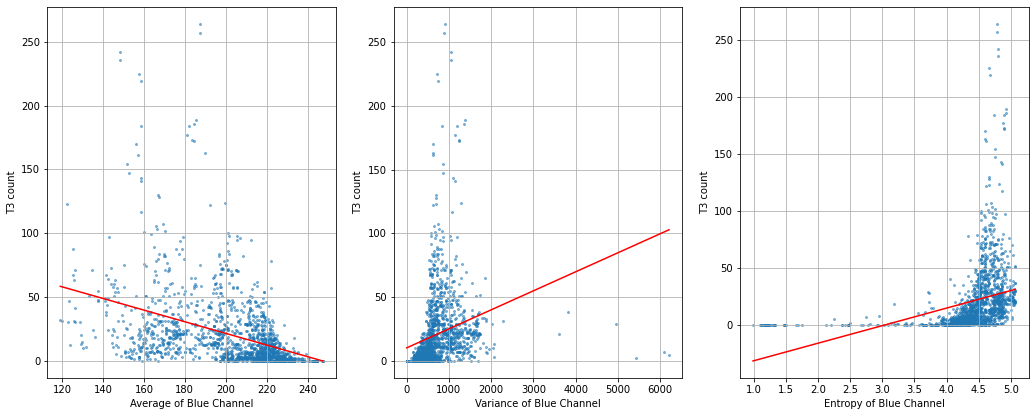

Average of H Channel Correlation Coeeficient is :0.3775802410072585
[[1.         0.37758024]
 [0.37758024 1.        ]]
Variance of H Channel Correlation Coeeficient is :0.5059295962096404
[[1.        0.5059296]
 [0.5059296 1.       ]]
Entropy of H Channel Correlation Coeeficient is :0.3417029786937837
[[1.         0.34170298]
 [0.34170298 1.        ]]


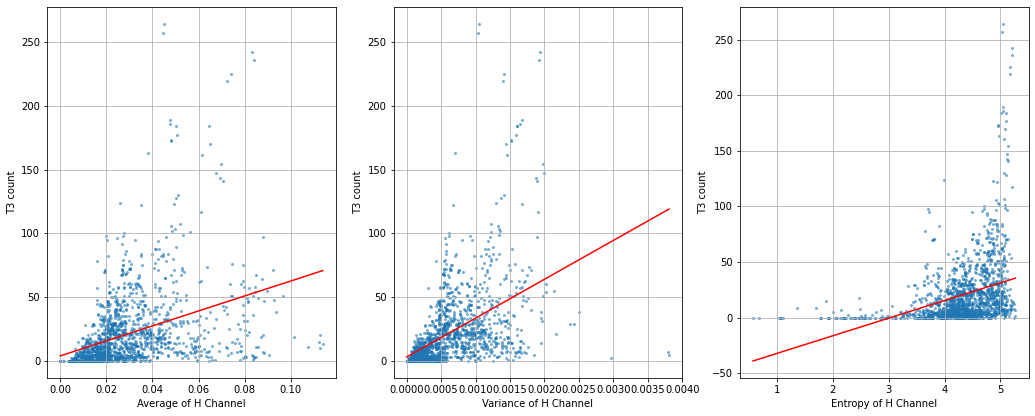

In [26]:
plt.figure(figsize=(30, 15))
plt.subplot(2,5,1)
featureAnalysis(avgR1,"Average of Red Channel")
plt.subplot(2,5,2)
featureAnalysis(varR1,"Variance of Red Channel")
plt.subplot(2,5,3)
featureAnalysis(entR1,"Entropy of Red Channel")
plt.show()


plt.figure(figsize=(30, 15))
plt.subplot(2,5,1)
featureAnalysis(avgG1,"Average of Green Channel")
plt.subplot(2,5,2)
featureAnalysis(varG1,"Variance of Green Channel")
plt.subplot(2,5,3)
featureAnalysis(entG1,"Entropy of Green Channel")
plt.show()


plt.figure(figsize=(30, 15))
plt.subplot(2,5,1)
featureAnalysis(avgB1,"Average of Blue Channel")
plt.subplot(2,5,2)
featureAnalysis(varB1,"Variance of Blue Channel")
plt.subplot(2,5,3)
featureAnalysis(entB1,"Entropy of Blue Channel")
plt.show()


plt.figure(figsize=(30, 15))
plt.subplot(2,5,1)
featureAnalysis(avgH1,"Average of H Channel")
plt.subplot(2,5,2)
featureAnalysis(varH1,"Variance of H Channel")
plt.subplot(2,5,3)
featureAnalysis(entH1,"Entropy of H Channel")
plt.show()

In [41]:
for i in correlationCoefficients:
    print(i,correlationCoefficients[i])

Average of Red Channel -0.42853813311360844
Variance of Red Channel 0.5034712156736986
Entropy of Red Channel 0.4531559149766064
Average of Green Channel -0.44275272197605736
Variance of Green Channel 0.19899762799563564
Entropy of Green Channel 0.2790008656344572
Average of Blue Channel -0.4130071090205436
Variance of Blue Channel 0.3800848851424973
Entropy of Blue Channel 0.40520282681691117
Average of H Channel 0.45791926204073086
Variance of H Channel 0.5271569956702528
Entropy of H Channel 0.3604438309121492


By Looking at the correlation Coeeficients and the scatter plots, we determine that we should choose the following features as important:

We Observe that all of the average's show quite high correlation coeeficients with T3 count. However, we also observe that all of the averages for Red, Blue and Green seem to follow the same distribution on the scatter plot, and are all negative, so inlcuding multiple of them will probably not improve the quality of our model that much, so we choose to include the one of them with the largest absolute corellation coefficient (green). We also include average H, because it has a positive correlation coefficient (as opposed to a negative one), and so will be able to provide insights and weights that the other averages would not be able to.

-Average Green

-Average H

For the Variances, the variances of the Blue  Channel has quite a small correlation coefficient, so is not worth including as features in our model. This leaves us with the variance of the Red Channel, and the H channel. Since their scatter plots seem to differ sufficiently, we decide it is worth including both in the model.

-Variance of Red Channel

-Variance of H Channel

For the Entropies, the entropy of the Green Channel has a very low correlation coefficiant, so is not worth including in our model. The scatter plot of the H channel is sufficiently different to that of the other two channels, to warrent its inclusion in our model. This leaves us with the entropies of the Red channel and the Blue channel, both of which have quite similar scatter plots, so we just choose the one with the higher correlation coefficient.

-Entropy of Red, 

-Entropy of H Channel



In all of the above talking, we used "including the feature in out model" as a synonym for being important. However, when it comes to actually training a regression model, it is very much the case that all features are useful features, with some just being more useful than others. Therefore, the onyl reason we would limit what features we include is to train the model faster. 

Since we have a low number of features in total anyway, we don't have to worry about how long our model will take to train, because it will always be fast, so for the later models, we will include all of the features anyway



We also find the first 4 PCA coefficients for the data, and use those as features:

In [42]:
pca = PCA(n_components=4,svd_solver = 'randomized')
temp = X1.reshape(X1.shape[0],256*256*3)
print(temp.shape)
pca.fit(temp)


(1622, 196608)


PCA(n_components=4, svd_solver='randomized')

In [43]:
print(pca.explained_variance_)

[2.26190819e+08 8.76107950e+06 7.51002582e+06 7.14393519e+06]


In [44]:
z = pca.transform(temp)

In [45]:
pca1 = z[...,0]
pca2 = z[...,1]
pca3 = z[...,2]
pca4 = z[...,3]

In [46]:
print(pca1[0])

-11298.469933668666


ii. Try the following regression models with the features used in part-I. Plot the scatter plot
between true and predicted counts for each type of regression model for the test data.
Also, report your prediction performance in terms of RMSE, Pearson Correlation
Coefficient, Spearman Correlation Coefficient and R2 score

In [118]:
 chosenFeatures = np.array([avgG1,avgH1,varR1,varH1,entR1,entH1,pca1,pca2,pca3,pca4,
                          avgR1,avgB1,varB1,varG1,entB1,entG1])

In [119]:
#an experiment with removing the outliers from the data set and training a separate model on just those outliers
# def foldOutliers(features):
#     fOutliers = features[0]*0>1
    
#     k = 1.27
#     for feature in features:
#         out = outliers(feature,k)
#         fOutliers = np.logical_or(fOutliers,out)
#     return fOutliers

In [120]:
#fold1Outliers = foldOutliers(chosenFeatures)

In [121]:
#print(np.sum(fold1Outliers))

In [122]:
features = chosenFeatures
features = np.transpose(features)
labels = Y1.loc[:,"lymphocyte"]

In [123]:
def featuresForFold(fold):
    features = []
    H = hChannel(fold)
    R = fold[:,:,:,0]
    G = fold[:,:,:,1]
    B = fold[:,:,:,2]
    
    avgR = averageOfChannel(R)
    avgB = averageOfChannel(B) 
    varB = varianceOfChannel(G)
    varG = varianceOfChannel(B)
    
    tempB = B.reshape(B.shape[0],256**2)
    tempG = G.reshape(G.shape[0],256**2)
    
    probB = np.apply_along_axis(probDist,1,tempB)
    probG = np.apply_along_axis(probDist,1,tempG)
    
    entB = entropyOfChannel(probB)
    entG = entropyOfChannel(probG)
    
    
    avgG = averageOfChannel(G)
    avgH = averageOfChannel(H)
    
    varR = varianceOfChannel(R)
    varH = varianceOfChannel(H)
    
    tempR = R.reshape(R.shape[0],256**2)
    tempH = H.reshape(H.shape[0],256**2)
    
    probR = np.apply_along_axis(probDist,1,tempR)
    probH = np.apply_along_axis(probDist,1,tempH)
    
    entR = entropyOfChannel(probR)
    entH = entropyOfChannel(probH)
    
    pca = PCA(n_components=4,svd_solver = 'randomized')
    temp = fold.reshape(fold.shape[0],256*256*3)
    print(temp.shape)
    pca.fit(temp)
    
    z = pca.transform(temp)
    
    pca1 = z[...,0]
    pca2 = z[...,1]
    pca3 = z[...,2]
    pca4 = z[...,3]

    
    features = np.array([avgG,avgH,
                         varR,varH,
                         entR,entH,
                        pca1,pca2,pca3,pca4,
                        avgR,avgB,varB,varG,entG,entB])
    return features

In [124]:
# def outliersScore(model,features,labels,validationFeatures,validationLabels):
#     features = np.transpose(features)
#     validationFeatures = np.transpose(validationFeatures)
#     outliers = foldOutliers(features)
#     valOutliers = foldOutliers(validationFeatures)
#     features = np.transpose(features)
#     validationFeatures = np.transpose(validationFeatures)
#     inModel = model.fit(features[~outliers],labels[~outliers])
#     a = inModel.score(validationFeatures[~valOutliers],validationLabels[~valOutliers])
#     outModel = model.fit(features[outliers],labels[outliers])
#     b = inModel.score(validationFeatures[valOutliers],validationLabels[valOutliers])
#     inCount = sum(~valOutliers)
#     outCount = sum(valOutliers)
#     print(a)
#     print(b)
#     return ((a* inCount + b* outCount)/(inCount+outCount))

In [125]:
#outliersScore(LinearRegression(),features,labels,features,labels)

In [126]:
validationFeatures = featuresForFold(X2)

validationLabels = Y2.loc[:,"lymphocyte"]
validationFeatures =np.transpose(validationFeatures)

(1751, 196608)


In [127]:
testFeatures = featuresForFold(X3)
testLabels = Y3.loc[:,"lymphocyte"]
testFeatures = np.transpose(testFeatures)

(1608, 196608)


In [128]:
def modelResults(model,Xtest,Ytest):
    
    predictions = model.predict(Xtest)
    
    plt.scatter(Ytest,predictions,  s=4 , alpha = 0.5)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
    plt.tight_layout
    plt.xlabel("True counts")
    plt.ylabel("Predicted counts")
    plt.grid()
    plt.show()
    
    
    print("R2 score: ", r2_score(predictions,Ytest) )
    print("RMSE: ", mean_squared_error(predictions,Ytest,squared = True) )
    print("Pearson Correlation Coefficient: ", pearsonr(predictions,Ytest)[0] )
    print("Spearman Correlation Coefficient: ", spearmanr(predictions,Ytest)[0] )
    

In [129]:
# X12 = X[F!=3]
# combinedFeatures = featuresForFold(X12)

a. Ordinary Least Squares (OLS) regression

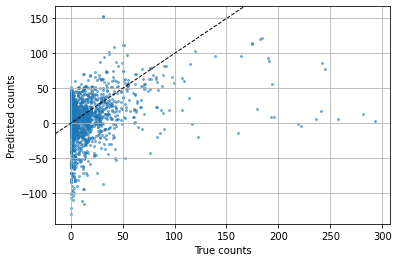

R2 score:  -0.34692758509419286
RMSE:  1433.0911046667163
Pearson Correlation Coefficient:  0.2933187577906824
Spearman Correlation Coefficient:  0.16940646210899496


In [130]:
reg = LinearRegression().fit(features, labels)

modelResults(reg,testFeatures,testLabels)

b. Support Vector Regression OR Multilayer Perceptron (MLP) OR Both (both)

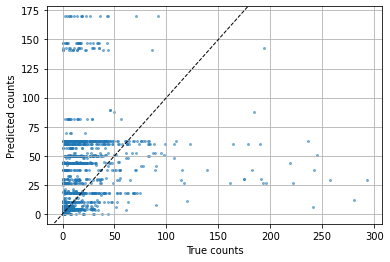

R2 score:  -0.6029882867443279
RMSE:  1851.0068407960198
Pearson Correlation Coefficient:  0.21721263319403866
Spearman Correlation Coefficient:  0.5146338012229489


In [131]:
mlp = MLPClassifier().fit(features,labels)

modelResults(mlp,testFeatures,testLabels)


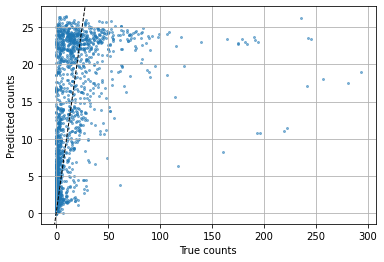

R2 score:  -9.006921504356436
RMSE:  767.9605587776929
Pearson Correlation Coefficient:  0.37112531031295826
Spearman Correlation Coefficient:  0.6271804238342319


In [132]:
svr = SVR().fit(features,labels)

modelResults(svr,testFeatures,testLabels)

In [62]:
testFeatures = []
validationFeatures = []
features = []
chosenFeatures = []
validationLabels = []
testLabels = []
labels = []

**Question No. 3 (Using Convolutional Neural Networks) [40 Marks]**

a. Use a convolutional neural network (in Keras or PyTorch) to solve this problem in much the
same was as in part (ii) of Question (2). You are to develop an architecture of the neural
network that takes an image directly as input and produces a count as the output
corresponding to T3 cells. You are free to choose any network structure as long as you can
show that it gives good performance. Report your results on the test examples by plotting
the scatter plot between true and predicted counts on the test data. Also, report your
results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient
and R2 score. You will be evaluated on the design of your machine learning model and final
performance metrics. Try to get the best test performance you can. Please include
convergence plots in your submission showing how does loss change over training epochs.
[20 Marks]


In [63]:
# Model / data parameters
num_classes = 500
input_shape = (256, 256, 3)

X12 = X[F!=3]
Y12 = Y[F!=3]

# Scale images to the [0, 1] range
x_train = X12.astype("float32") / 255
x_test = X3.astype("float32") / 255


print(x_train.shape)
print(x_test.shape)
# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(Y1.loc[:,"lymphocyte"], num_classes)
# y_test = keras.utils.to_categorical(Y3.loc[:,"lymphocyte"], num_classes)
print()
y_train = np.array(Y12.loc[:,"lymphocyte"])
y_test = np.array(Y3.loc[:,"lymphocyte"])

(3373, 256, 256, 3)
(1608, 256, 256, 3)
x_train shape: (3373, 256, 256, 3)
3373 train samples
1608 test samples



In [70]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, 5, strides = 1, activation="relu"),
        layers.MaxPooling2D(pool_size=(4, 4)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=(4, 4)),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        #layers.Dense(num_classes/10, activation="relu", kernel_initializer='he_uniform'),
        layers.Dense(1, activation="linear"),
        
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 15, 15, 64)        2112      
                                                                 
 dense_1 (Dense)             (None, 15, 15, 64)        4

In [71]:
batch_size = 230
epochs = 20

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
14/14 [==============================] - 87s 5s/step - loss: 1106.2588 - mean_squared_error: 1106.2588 - val_loss: 987.5237 - val_mean_squared_error: 987.5237
Epoch 2/20
14/14 [==============================] - 64s 5s/step - loss: 963.2132 - mean_squared_error: 963.2132 - val_loss: 920.5778 - val_mean_squared_error: 920.5778
Epoch 3/20
14/14 [==============================] - 62s 4s/step - loss: 841.3666 - mean_squared_error: 841.3666 - val_loss: 844.3365 - val_mean_squared_error: 844.3365
Epoch 4/20
14/14 [==============================] - 63s 4s/step - loss: 745.1239 - mean_squared_error: 745.1239 - val_loss: 804.3883 - val_mean_squared_error: 804.3883
Epoch 5/20
14/14 [==============================] - 62s 4s/step - loss: 718.2712 - mean_squared_error: 718.2712 - val_loss: 852.7793 - val_mean_squared_error: 852.7793
Epoch 6/20
14/14 [==============================] - 62s 4s/step - loss: 707.3028 - mean_squared_error: 707.3028 - val_loss: 725.0326 - val_mean_squared_error:

In [72]:
predicterinos = model.predict(x_test)

In [73]:
print(predicterinos)
print(r2_score(predicterinos,Y3.loc[:,"lymphocyte"]))

[[22.94481 ]
 [22.86983 ]
 [23.2506  ]
 ...
 [10.350969]
 [24.297216]
 [19.294916]]
0.13277530614347377


In [14]:
def modelResults(model,Xtest,Ytest):
    
    predictions = model.predict(Xtest)
    predictions = predictions.reshape(predictions.shape[0])
    
    plt.scatter(Ytest,predictions,  s=4 , alpha = 0.5)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
    plt.tight_layout
    plt.xlabel("True counts")
    plt.ylabel("Predicted counts")
    plt.grid()
    plt.show()
    
    
    print("R2 score: ", r2_score(predictions,Ytest) )
    print("RMSE: ", mean_squared_error(predictions,Ytest,squared = True) )
    print("Pearson Correlation Coefficient: ", pearsonr(predictions,Ytest)[0] )
    print("Spearman Correlation Coefficient: ", spearmanr(predictions,Ytest)[0] )

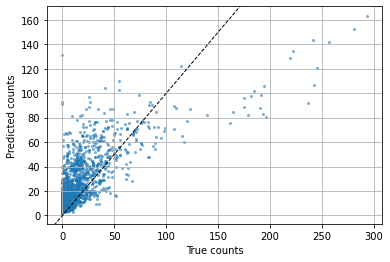

R2 score:  0.13277530614347377
RMSE:  476.2123709618776
Pearson Correlation Coefficient:  0.7335161250613285
Spearman Correlation Coefficient:  0.7765992026000876


In [137]:
modelResults(model,x_test,y_test)

b. Use three fold cross validation with your optimal network architecture to predict the counts
of T3 cells. Do 3-fold cross-validation with the given folds and report the results for each test
fold in the form of separate predicted-vs-actual count scatter plots (3 folds so 3 plots in
total) using your model and report your results in terms of RMSE, Pearson Correlation
Coefficient, Spearman Correlation Coefficient and R2 score for each fold separately. [5
Marks]

We would normally use the same model as we just trained, however at this point, we run out of memory to generate the new models on 3 fold validation, so we will reduce the size of the images, and then continue with our previous model. The performance of the following models looks bad, but this is just because I didn't have time to optimise the model for the smaller image size, it is instead optimised for the larger image size - if I had more memory, I would have just been able to run the model on the original data for all the remainder.

In [3]:

reducedData = []
for i in X:
    reducedData.append(resize(i, (128,128,3)))

reducedData = np.array(reducedData)

In [4]:
#we redefine our model, with our new input size
model2 = keras.Sequential(
    [
        keras.Input(shape=(128,128,3)),
        layers.Conv2D(32, 5, strides = 1, activation="relu"),
        layers.MaxPooling2D(pool_size=(4, 4)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=(4, 4)),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        #layers.Dense(num_classes/10, activation="relu", kernel_initializer='he_uniform'),
        layers.Dense(1, activation="linear"),
        
    ]
)

In [10]:
#creating the different test and train folds for the 3-fold-cross-validation
xTrain1 = reducedData[F!=3]
xTest1 = reducedData[F==3]
yTrain1 = Y[F!=3]
yTest1 = Y[F==3]

xTrain2 = reducedData[F!=2]
xTest2 = reducedData[F==2]
yTrain2 = Y[F!=2]
yTest2 = Y[F==2]

xTrain3 = reducedData[F!=1]
xTest3 = reducedData[F==1]
yTrain3 = Y[F!=1]
yTest3 = Y[F==1]

folds3 = [[xTrain1,xTest1,yTrain1,yTest1],[xTrain2,xTest2,yTrain2,yTest2],[xTrain3,xTest3,yTrain3,yTest3]]

In [17]:
def threeFoldVal(folds,model,cellType):
    for j,fold in enumerate(folds):
        xTrain = fold[0].astype("float32") / 255
        xTest = fold[1].astype("float32") / 255
        temp1 = (fold[2])
        temp2 = (fold[3])
        yTrain = np.array(temp1.loc[:,cellType])
        yTest = np.array(temp2.loc[:,cellType])
        
        
        batch_size = 150
        epochs = 10

        model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

        model.fit(xTrain, yTrain, batch_size=batch_size, epochs=epochs, validation_split=0.1)

        print("Predicting count of " + cellType + ":")
        print("Fold " + str(3-j) + " is the testing fold. The other two folds are the training & validation folds, giving the following performance:")
        modelResults(model,xTest,yTest)

Epoch 1/10
21/21 [==============================] - 15s 691ms/step - loss: 801.3780 - mean_squared_error: 801.3780 - val_loss: 879.6678 - val_mean_squared_error: 879.6678
Epoch 2/10
21/21 [==============================] - 15s 713ms/step - loss: 806.1578 - mean_squared_error: 806.1578 - val_loss: 895.6266 - val_mean_squared_error: 895.6266
Epoch 3/10
21/21 [==============================] - 14s 676ms/step - loss: 813.1356 - mean_squared_error: 813.1356 - val_loss: 937.6030 - val_mean_squared_error: 937.6030
Epoch 4/10
21/21 [==============================] - 15s 702ms/step - loss: 806.9666 - mean_squared_error: 806.9666 - val_loss: 899.2771 - val_mean_squared_error: 899.2771
Epoch 5/10
21/21 [==============================] - 15s 695ms/step - loss: 800.9003 - mean_squared_error: 800.9003 - val_loss: 883.4143 - val_mean_squared_error: 883.4143
Epoch 6/10
21/21 [==============================] - 14s 675ms/step - loss: 803.2371 - mean_squared_error: 803.2371 - val_loss: 879.6113 - val_mea

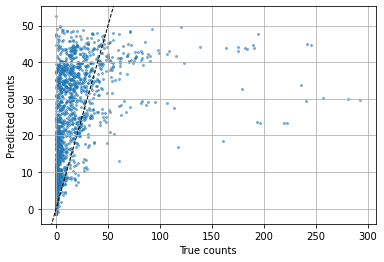

R2 score:  -3.2077710754341666
RMSE:  791.4446366330925
Pearson Correlation Coefficient:  0.39980774144914977
Spearman Correlation Coefficient:  0.6641630566159908
Epoch 1/10
20/20 [==============================] - 15s 722ms/step - loss: 600.7560 - mean_squared_error: 600.7560 - val_loss: 1638.6570 - val_mean_squared_error: 1638.6570
Epoch 2/10
20/20 [==============================] - 14s 682ms/step - loss: 594.5031 - mean_squared_error: 594.5032 - val_loss: 1668.7490 - val_mean_squared_error: 1668.7490
Epoch 3/10
20/20 [==============================] - 13s 666ms/step - loss: 596.9553 - mean_squared_error: 596.9553 - val_loss: 1629.1071 - val_mean_squared_error: 1629.1071
Epoch 4/10
20/20 [==============================] - 14s 690ms/step - loss: 600.2660 - mean_squared_error: 600.2660 - val_loss: 1653.9857 - val_mean_squared_error: 1653.9857
Epoch 5/10
20/20 [==============================] - 14s 682ms/step - loss: 594.3049 - mean_squared_error: 594.3049 - val_loss: 1631.8042 - val_m

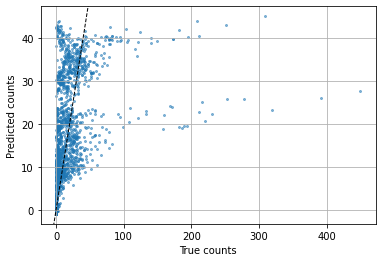

R2 score:  -5.668188251618312
RMSE:  946.3233607504524
Pearson Correlation Coefficient:  0.3583941509754162
Spearman Correlation Coefficient:  0.5864165481762168
Epoch 1/10
21/21 [==============================] - 15s 675ms/step - loss: 759.1035 - mean_squared_error: 759.1035 - val_loss: 1685.7861 - val_mean_squared_error: 1685.7861
Epoch 2/10
21/21 [==============================] - 14s 663ms/step - loss: 754.5947 - mean_squared_error: 754.5947 - val_loss: 1686.4802 - val_mean_squared_error: 1686.4802
Epoch 3/10
21/21 [==============================] - 14s 664ms/step - loss: 755.2924 - mean_squared_error: 755.2924 - val_loss: 1689.9624 - val_mean_squared_error: 1689.9624
Epoch 4/10
21/21 [==============================] - 14s 665ms/step - loss: 756.8301 - mean_squared_error: 756.8301 - val_loss: 1690.5923 - val_mean_squared_error: 1690.5923
Epoch 5/10
21/21 [==============================] - 14s 662ms/step - loss: 760.0032 - mean_squared_error: 760.0032 - val_loss: 1681.7089 - val_mea

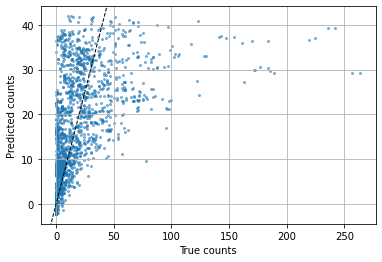

R2 score:  -3.8177360003254908
RMSE:  656.0481550920855
Pearson Correlation Coefficient:  0.46742477481073635
Spearman Correlation Coefficient:  0.6236318602839305


In [18]:
threeFoldVal(folds3,model2,"lymphocyte")

c. Use a convolutional neural network (in Keras or Pytorch) to predict the counts of 6 types of
cells simultaneously given the image patch as input and perform 3-fold cross-validation using
the given folds. You are free to choose any network structure as long as you can show that it
gives good cross-validation performance. Do 3-fold cross-validation using the specified folds
and report the results for each test fold for each cell type in the form of separate predictedvs-actual count scatter plots (3 folds, 6 cell types so 18 plots in total) using your optimal
machine learning model and report your results in terms of RMSE, Pearson Correlation
Coefficient, Spearman Correlation Coefficient and R2 score for each cell type and each fold
separately along with the average of each cell type across the 3 folds. [15 Marks]

Epoch 1/10
21/21 [==============================] - 14s 650ms/step - loss: 70.2799 - mean_squared_error: 70.2799 - val_loss: 2.4173 - val_mean_squared_error: 2.4173
Epoch 2/10
21/21 [==============================] - 14s 651ms/step - loss: 13.8634 - mean_squared_error: 13.8634 - val_loss: 1.3420 - val_mean_squared_error: 1.3420
Epoch 3/10
21/21 [==============================] - 14s 656ms/step - loss: 12.3429 - mean_squared_error: 12.3429 - val_loss: 1.1971 - val_mean_squared_error: 1.1971
Epoch 4/10
21/21 [==============================] - 14s 668ms/step - loss: 12.1756 - mean_squared_error: 12.1756 - val_loss: 0.8656 - val_mean_squared_error: 0.8656
Epoch 5/10
21/21 [==============================] - 14s 668ms/step - loss: 12.1142 - mean_squared_error: 12.1142 - val_loss: 0.9186 - val_mean_squared_error: 0.9186
Epoch 6/10
21/21 [==============================] - 15s 690ms/step - loss: 12.1249 - mean_squared_error: 12.1249 - val_loss: 1.0798 - val_mean_squared_error: 1.0798
Epoch 7/10

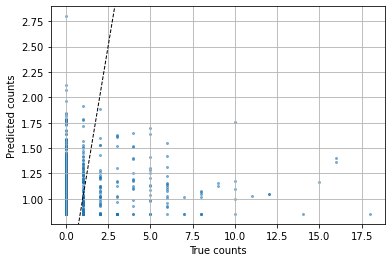

R2 score:  -63.655001443919716
RMSE:  2.8255327935696792
Pearson Correlation Coefficient:  0.1646500839390866
Spearman Correlation Coefficient:  0.22369240600627907
Epoch 1/10
20/20 [==============================] - 15s 746ms/step - loss: 7.9325 - mean_squared_error: 7.9325 - val_loss: 1.4099 - val_mean_squared_error: 1.4099
Epoch 2/10
20/20 [==============================] - 15s 754ms/step - loss: 7.9365 - mean_squared_error: 7.9365 - val_loss: 1.4933 - val_mean_squared_error: 1.4933
Epoch 3/10
20/20 [==============================] - 15s 744ms/step - loss: 7.8209 - mean_squared_error: 7.8209 - val_loss: 1.7996 - val_mean_squared_error: 1.7996
Epoch 4/10
20/20 [==============================] - 14s 693ms/step - loss: 7.8217 - mean_squared_error: 7.8217 - val_loss: 1.9889 - val_mean_squared_error: 1.9889
Epoch 5/10
20/20 [==============================] - 14s 683ms/step - loss: 7.8808 - mean_squared_error: 7.8808 - val_loss: 1.8206 - val_mean_squared_error: 1.8206
Epoch 6/10
20/20 [==

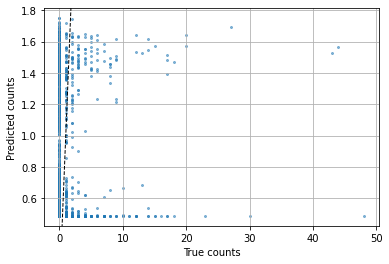

R2 score:  -59.77203068251163
RMSE:  9.90126029447242
Pearson Correlation Coefficient:  0.12538073657012413
Spearman Correlation Coefficient:  0.06360005265319495
Epoch 1/10
21/21 [==============================] - 16s 712ms/step - loss: 7.0127 - mean_squared_error: 7.0127 - val_loss: 1.6826 - val_mean_squared_error: 1.6826
Epoch 2/10
21/21 [==============================] - 14s 664ms/step - loss: 6.9866 - mean_squared_error: 6.9866 - val_loss: 1.5258 - val_mean_squared_error: 1.5258
Epoch 3/10
21/21 [==============================] - 14s 661ms/step - loss: 7.0014 - mean_squared_error: 7.0014 - val_loss: 1.5035 - val_mean_squared_error: 1.5035
Epoch 4/10
21/21 [==============================] - 14s 662ms/step - loss: 6.9953 - mean_squared_error: 6.9953 - val_loss: 1.6561 - val_mean_squared_error: 1.6561
Epoch 5/10
21/21 [==============================] - 14s 664ms/step - loss: 7.0123 - mean_squared_error: 7.0123 - val_loss: 1.3324 - val_mean_squared_error: 1.3324
Epoch 6/10
21/21 [====

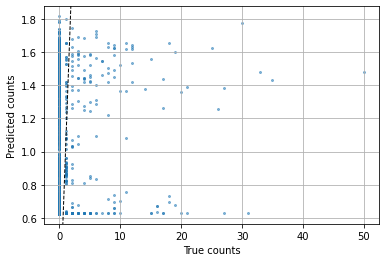

R2 score:  -85.95634414963315
RMSE:  11.605816876167761
Pearson Correlation Coefficient:  0.1617365050420215
Spearman Correlation Coefficient:  0.12284279261326493
Epoch 1/10
21/21 [==============================] - 15s 675ms/step - loss: 2745.7317 - mean_squared_error: 2745.7317 - val_loss: 5026.7114 - val_mean_squared_error: 5026.7114
Epoch 2/10
21/21 [==============================] - 14s 667ms/step - loss: 1386.2333 - mean_squared_error: 1386.2333 - val_loss: 1870.5649 - val_mean_squared_error: 1870.5649
Epoch 3/10
21/21 [==============================] - 14s 677ms/step - loss: 1080.1229 - mean_squared_error: 1080.1229 - val_loss: 2083.8577 - val_mean_squared_error: 2083.8577
Epoch 4/10
21/21 [==============================] - 14s 683ms/step - loss: 1075.3804 - mean_squared_error: 1075.3804 - val_loss: 2003.3229 - val_mean_squared_error: 2003.3229
Epoch 5/10
21/21 [==============================] - 15s 730ms/step - loss: 1074.2771 - mean_squared_error: 1074.2771 - val_loss: 2040.24

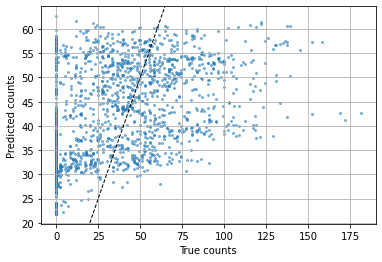

R2 score:  -9.808342768304527
RMSE:  1018.2302009808985
Pearson Correlation Coefficient:  0.3897274888704219
Spearman Correlation Coefficient:  0.4082059865228268
Epoch 1/10
20/20 [==============================] - 14s 690ms/step - loss: 1144.4500 - mean_squared_error: 1144.4500 - val_loss: 1463.2162 - val_mean_squared_error: 1463.2162
Epoch 2/10
20/20 [==============================] - 14s 678ms/step - loss: 1143.7493 - mean_squared_error: 1143.7493 - val_loss: 1524.2019 - val_mean_squared_error: 1524.2019
Epoch 3/10
20/20 [==============================] - 13s 674ms/step - loss: 1132.7562 - mean_squared_error: 1132.7562 - val_loss: 1523.0786 - val_mean_squared_error: 1523.0786
Epoch 4/10
20/20 [==============================] - 13s 673ms/step - loss: 1125.7473 - mean_squared_error: 1125.7474 - val_loss: 1526.2587 - val_mean_squared_error: 1526.2587
Epoch 5/10
20/20 [==============================] - 14s 677ms/step - loss: 1129.7932 - mean_squared_error: 1129.7932 - val_loss: 1562.242

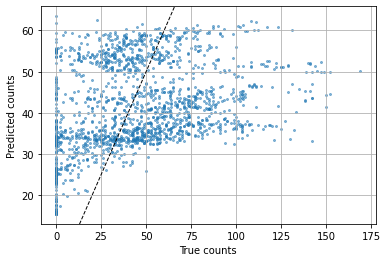

R2 score:  -7.842856659414155
RMSE:  996.2920516474627
Pearson Correlation Coefficient:  0.3383624458657532
Spearman Correlation Coefficient:  0.3661833140344349
Epoch 1/10
21/21 [==============================] - 17s 782ms/step - loss: 916.0146 - mean_squared_error: 916.0146 - val_loss: 1860.1119 - val_mean_squared_error: 1860.1116
Epoch 2/10
21/21 [==============================] - 15s 697ms/step - loss: 920.5352 - mean_squared_error: 920.5352 - val_loss: 1957.4424 - val_mean_squared_error: 1957.4424
Epoch 3/10
21/21 [==============================] - 14s 676ms/step - loss: 908.6799 - mean_squared_error: 908.6799 - val_loss: 1987.2572 - val_mean_squared_error: 1987.2572
Epoch 4/10
21/21 [==============================] - 14s 685ms/step - loss: 910.1608 - mean_squared_error: 910.1607 - val_loss: 1787.0153 - val_mean_squared_error: 1787.0153
Epoch 5/10
21/21 [==============================] - 14s 680ms/step - loss: 896.1232 - mean_squared_error: 896.1232 - val_loss: 1723.2294 - val_mea

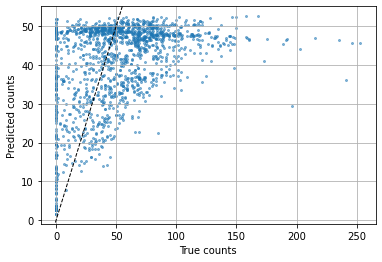

R2 score:  -8.034601064842029
RMSE:  1272.319252874545
Pearson Correlation Coefficient:  0.4300974444184033
Spearman Correlation Coefficient:  0.3596738450749544
Epoch 1/10
21/21 [==============================] - 18s 736ms/step - loss: 877.2516 - mean_squared_error: 877.2516 - val_loss: 897.9445 - val_mean_squared_error: 897.9445
Epoch 2/10
21/21 [==============================] - 16s 737ms/step - loss: 814.0038 - mean_squared_error: 814.0038 - val_loss: 892.8393 - val_mean_squared_error: 892.8393
Epoch 3/10
21/21 [==============================] - 15s 727ms/step - loss: 808.6075 - mean_squared_error: 808.6075 - val_loss: 877.6793 - val_mean_squared_error: 877.6793
Epoch 4/10
21/21 [==============================] - 14s 656ms/step - loss: 805.0336 - mean_squared_error: 805.0336 - val_loss: 872.8980 - val_mean_squared_error: 872.8980
Epoch 5/10
21/21 [==============================] - 13s 638ms/step - loss: 807.3187 - mean_squared_error: 807.3187 - val_loss: 877.8838 - val_mean_squared

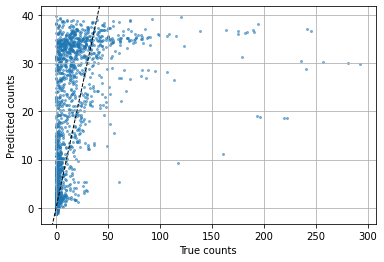

R2 score:  -2.9304108534398376
RMSE:  746.2707041652417
Pearson Correlation Coefficient:  0.3969909923957055
Spearman Correlation Coefficient:  0.6671452616250304
Epoch 1/10
20/20 [==============================] - 14s 683ms/step - loss: 598.1297 - mean_squared_error: 598.1297 - val_loss: 1604.1582 - val_mean_squared_error: 1604.1583
Epoch 2/10
20/20 [==============================] - 13s 671ms/step - loss: 596.7511 - mean_squared_error: 596.7511 - val_loss: 1635.0146 - val_mean_squared_error: 1635.0146
Epoch 3/10
20/20 [==============================] - 13s 671ms/step - loss: 595.5214 - mean_squared_error: 595.5214 - val_loss: 1673.6124 - val_mean_squared_error: 1673.6124
Epoch 4/10
20/20 [==============================] - 13s 671ms/step - loss: 598.5919 - mean_squared_error: 598.5919 - val_loss: 1624.3313 - val_mean_squared_error: 1624.3313
Epoch 5/10
20/20 [==============================] - 13s 673ms/step - loss: 593.6400 - mean_squared_error: 593.6400 - val_loss: 1617.0823 - val_me

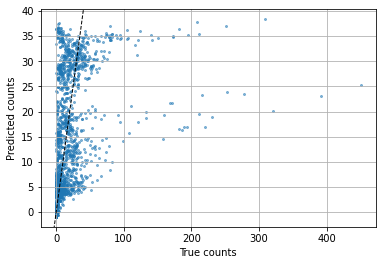

R2 score:  -6.1497402601876905
RMSE:  968.5461471329241
Pearson Correlation Coefficient:  0.35377892188075655
Spearman Correlation Coefficient:  0.5790582175498548
Epoch 1/10
21/21 [==============================] - 14s 657ms/step - loss: 755.1978 - mean_squared_error: 755.1978 - val_loss: 1684.1193 - val_mean_squared_error: 1684.1193
Epoch 2/10
21/21 [==============================] - 13s 640ms/step - loss: 749.7334 - mean_squared_error: 749.7333 - val_loss: 1705.6599 - val_mean_squared_error: 1705.6599
Epoch 3/10
21/21 [==============================] - 14s 644ms/step - loss: 750.1208 - mean_squared_error: 750.1208 - val_loss: 1670.1635 - val_mean_squared_error: 1670.1635
Epoch 4/10
21/21 [==============================] - 14s 652ms/step - loss: 749.2742 - mean_squared_error: 749.2742 - val_loss: 1678.8988 - val_mean_squared_error: 1678.8988
Epoch 5/10
21/21 [==============================] - 14s 674ms/step - loss: 746.5505 - mean_squared_error: 746.5505 - val_loss: 1680.0835 - val_m

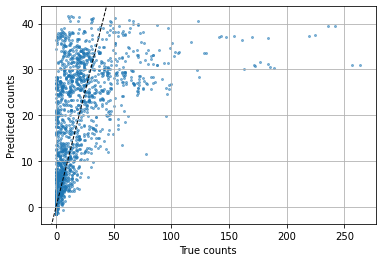

R2 score:  -3.434354602712145
RMSE:  644.8962468311387
Pearson Correlation Coefficient:  0.47513010086310803
Spearman Correlation Coefficient:  0.625943293838851
Epoch 1/10
21/21 [==============================] - 15s 670ms/step - loss: 102.6493 - mean_squared_error: 102.6493 - val_loss: 86.4107 - val_mean_squared_error: 86.4107
Epoch 2/10
21/21 [==============================] - 15s 696ms/step - loss: 56.1606 - mean_squared_error: 56.1606 - val_loss: 71.7631 - val_mean_squared_error: 71.7631
Epoch 3/10
21/21 [==============================] - 14s 665ms/step - loss: 54.1816 - mean_squared_error: 54.1816 - val_loss: 70.0211 - val_mean_squared_error: 70.0211
Epoch 4/10
21/21 [==============================] - 14s 680ms/step - loss: 53.5002 - mean_squared_error: 53.5002 - val_loss: 70.1163 - val_mean_squared_error: 70.1163
Epoch 5/10
21/21 [==============================] - 14s 672ms/step - loss: 53.5797 - mean_squared_error: 53.5797 - val_loss: 69.8560 - val_mean_squared_error: 69.8560
E

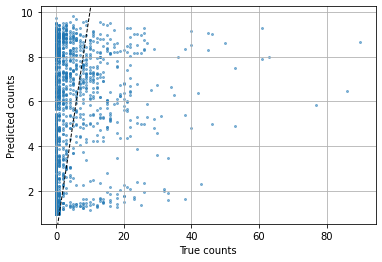

R2 score:  -7.971155564173948
RMSE:  72.72637159731597
Pearson Correlation Coefficient:  0.2026995087967027
Spearman Correlation Coefficient:  0.36831878406136576
Epoch 1/10
20/20 [==============================] - 15s 753ms/step - loss: 52.8007 - mean_squared_error: 52.8007 - val_loss: 180.5171 - val_mean_squared_error: 180.5171
Epoch 2/10
20/20 [==============================] - 15s 755ms/step - loss: 52.9236 - mean_squared_error: 52.9236 - val_loss: 180.6879 - val_mean_squared_error: 180.6879
Epoch 3/10
20/20 [==============================] - 16s 800ms/step - loss: 52.6838 - mean_squared_error: 52.6838 - val_loss: 180.1101 - val_mean_squared_error: 180.1101
Epoch 4/10
20/20 [==============================] - 13s 667ms/step - loss: 52.6708 - mean_squared_error: 52.6708 - val_loss: 178.3160 - val_mean_squared_error: 178.3160
Epoch 5/10
20/20 [==============================] - 13s 665ms/step - loss: 52.7167 - mean_squared_error: 52.7167 - val_loss: 178.3726 - val_mean_squared_error: 1

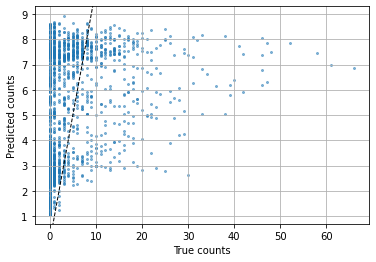

R2 score:  -8.507508319633727
RMSE:  51.164732741080414
Pearson Correlation Coefficient:  0.3223211384252097
Spearman Correlation Coefficient:  0.4647013387566336
Epoch 1/10
21/21 [==============================] - 16s 733ms/step - loss: 49.8418 - mean_squared_error: 49.8418 - val_loss: 150.2639 - val_mean_squared_error: 150.2639
Epoch 2/10
21/21 [==============================] - 14s 676ms/step - loss: 49.2500 - mean_squared_error: 49.2500 - val_loss: 150.4160 - val_mean_squared_error: 150.4160
Epoch 3/10
21/21 [==============================] - 14s 679ms/step - loss: 49.2687 - mean_squared_error: 49.2687 - val_loss: 148.4938 - val_mean_squared_error: 148.4938
Epoch 4/10
21/21 [==============================] - 15s 692ms/step - loss: 48.9346 - mean_squared_error: 48.9346 - val_loss: 151.0266 - val_mean_squared_error: 151.0266
Epoch 5/10
21/21 [==============================] - 19s 907ms/step - loss: 48.8387 - mean_squared_error: 48.8387 - val_loss: 150.1564 - val_mean_squared_error: 1

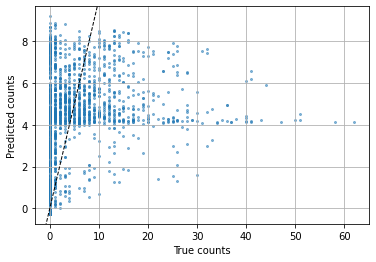

R2 score:  -13.601449477520232
RMSE:  66.82570001644872
Pearson Correlation Coefficient:  0.18934613998167965
Spearman Correlation Coefficient:  0.282311336411148
Epoch 1/10
21/21 [==============================] - 15s 682ms/step - loss: 5.6159 - mean_squared_error: 5.6159 - val_loss: 2.5130 - val_mean_squared_error: 2.5130
Epoch 2/10
21/21 [==============================] - 15s 695ms/step - loss: 2.6115 - mean_squared_error: 2.6115 - val_loss: 1.8629 - val_mean_squared_error: 1.8629
Epoch 3/10
21/21 [==============================] - 14s 680ms/step - loss: 2.3969 - mean_squared_error: 2.3969 - val_loss: 1.8219 - val_mean_squared_error: 1.8219
Epoch 4/10
21/21 [==============================] - 14s 681ms/step - loss: 2.3719 - mean_squared_error: 2.3719 - val_loss: 1.6383 - val_mean_squared_error: 1.6383
Epoch 5/10
21/21 [==============================] - 14s 678ms/step - loss: 2.3565 - mean_squared_error: 2.3565 - val_loss: 1.7213 - val_mean_squared_error: 1.7213
Epoch 6/10
21/21 [====

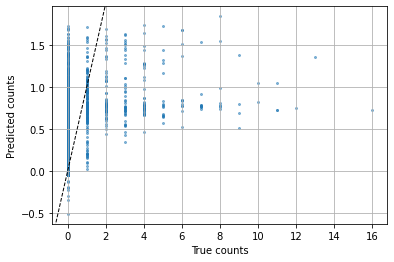

R2 score:  -14.021396070770134
RMSE:  2.3425910198733177
Pearson Correlation Coefficient:  0.2734934157209219
Spearman Correlation Coefficient:  0.3167380369470906
Epoch 1/10
20/20 [==============================] - 15s 722ms/step - loss: 2.1680 - mean_squared_error: 2.1680 - val_loss: 1.4746 - val_mean_squared_error: 1.4746
Epoch 2/10
20/20 [==============================] - 14s 681ms/step - loss: 2.1328 - mean_squared_error: 2.1328 - val_loss: 1.5379 - val_mean_squared_error: 1.5379
Epoch 3/10
20/20 [==============================] - 14s 696ms/step - loss: 2.1318 - mean_squared_error: 2.1318 - val_loss: 1.5313 - val_mean_squared_error: 1.5313
Epoch 4/10
20/20 [==============================] - 14s 686ms/step - loss: 2.1036 - mean_squared_error: 2.1036 - val_loss: 1.4435 - val_mean_squared_error: 1.4435
Epoch 5/10
20/20 [==============================] - 14s 685ms/step - loss: 2.0969 - mean_squared_error: 2.0969 - val_loss: 1.4562 - val_mean_squared_error: 1.4562
Epoch 6/10
20/20 [===

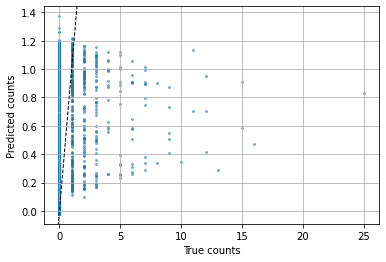

R2 score:  -18.47769095004448
RMSE:  2.7117467263853867
Pearson Correlation Coefficient:  0.1424157757505646
Spearman Correlation Coefficient:  0.2358316297066227
Epoch 1/10
21/21 [==============================] - 15s 685ms/step - loss: 2.6056 - mean_squared_error: 2.6056 - val_loss: 1.1752 - val_mean_squared_error: 1.1752
Epoch 2/10
21/21 [==============================] - 14s 676ms/step - loss: 2.5644 - mean_squared_error: 2.5644 - val_loss: 1.1045 - val_mean_squared_error: 1.1045
Epoch 3/10
21/21 [==============================] - 14s 675ms/step - loss: 2.5457 - mean_squared_error: 2.5457 - val_loss: 1.1753 - val_mean_squared_error: 1.1753
Epoch 4/10
21/21 [==============================] - 14s 681ms/step - loss: 2.5284 - mean_squared_error: 2.5284 - val_loss: 1.5927 - val_mean_squared_error: 1.5927
Epoch 5/10
21/21 [==============================] - 14s 682ms/step - loss: 2.5200 - mean_squared_error: 2.5200 - val_loss: 1.1798 - val_mean_squared_error: 1.1798
Epoch 6/10
21/21 [====

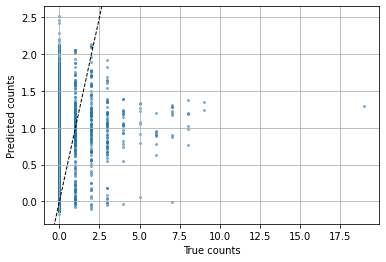

R2 score:  -5.044158885412501
RMSE:  1.9060355189585054
Pearson Correlation Coefficient:  0.14943010516926997
Spearman Correlation Coefficient:  0.19769707075728082
Epoch 1/10
21/21 [==============================] - 15s 691ms/step - loss: 479.9648 - mean_squared_error: 479.9648 - val_loss: 380.4221 - val_mean_squared_error: 380.4221
Epoch 2/10
21/21 [==============================] - 14s 682ms/step - loss: 261.1915 - mean_squared_error: 261.1915 - val_loss: 277.9364 - val_mean_squared_error: 277.9364
Epoch 3/10
21/21 [==============================] - 15s 700ms/step - loss: 256.7896 - mean_squared_error: 256.7896 - val_loss: 268.4156 - val_mean_squared_error: 268.4156
Epoch 4/10
21/21 [==============================] - 14s 683ms/step - loss: 250.4363 - mean_squared_error: 250.4364 - val_loss: 264.2685 - val_mean_squared_error: 264.2685
Epoch 5/10
21/21 [==============================] - 14s 682ms/step - loss: 247.7377 - mean_squared_error: 247.7377 - val_loss: 258.8165 - val_mean_squa

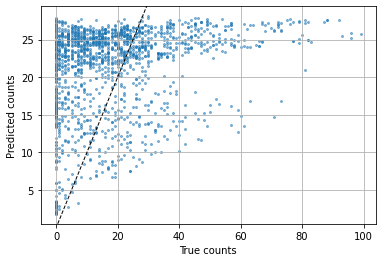

R2 score:  -8.019946188560796
RMSE:  309.05885635576414
Pearson Correlation Coefficient:  0.27163780118739167
Spearman Correlation Coefficient:  0.2989218991712285
Epoch 1/10
20/20 [==============================] - 15s 720ms/step - loss: 279.7422 - mean_squared_error: 279.7422 - val_loss: 284.0818 - val_mean_squared_error: 284.0818
Epoch 2/10
20/20 [==============================] - 14s 682ms/step - loss: 276.7498 - mean_squared_error: 276.7498 - val_loss: 275.2426 - val_mean_squared_error: 275.2426
Epoch 3/10
20/20 [==============================] - 14s 679ms/step - loss: 274.3507 - mean_squared_error: 274.3507 - val_loss: 277.2565 - val_mean_squared_error: 277.2565
Epoch 4/10
20/20 [==============================] - 14s 683ms/step - loss: 272.7754 - mean_squared_error: 272.7754 - val_loss: 271.6550 - val_mean_squared_error: 271.6550
Epoch 5/10
20/20 [==============================] - 14s 678ms/step - loss: 275.4842 - mean_squared_error: 275.4842 - val_loss: 276.8864 - val_mean_squar

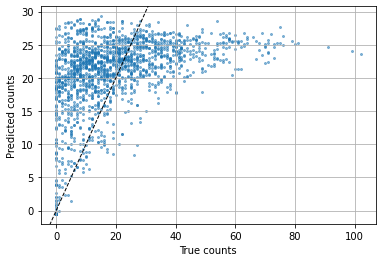

R2 score:  -4.751362327005644
RMSE:  215.16782343644988
Pearson Correlation Coefficient:  0.4394461910376062
Spearman Correlation Coefficient:  0.4878670985956166
Epoch 1/10
21/21 [==============================] - 16s 676ms/step - loss: 252.6817 - mean_squared_error: 252.6817 - val_loss: 250.1095 - val_mean_squared_error: 250.1095
Epoch 2/10
21/21 [==============================] - 13s 641ms/step - loss: 249.4071 - mean_squared_error: 249.4071 - val_loss: 243.9515 - val_mean_squared_error: 243.9515
Epoch 3/10
21/21 [==============================] - 13s 641ms/step - loss: 249.1169 - mean_squared_error: 249.1169 - val_loss: 246.1461 - val_mean_squared_error: 246.1461
Epoch 4/10
21/21 [==============================] - 14s 655ms/step - loss: 248.4928 - mean_squared_error: 248.4928 - val_loss: 247.6213 - val_mean_squared_error: 247.6213
Epoch 5/10
21/21 [==============================] - 14s 667ms/step - loss: 247.5749 - mean_squared_error: 247.5749 - val_loss: 251.0761 - val_mean_square

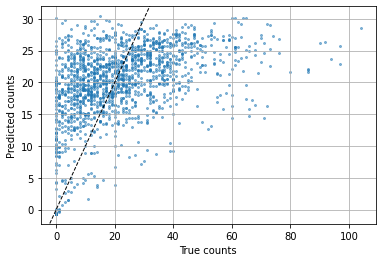

R2 score:  -5.35533950277324
RMSE:  240.87740588828356
Pearson Correlation Coefficient:  0.4439358056114699
Spearman Correlation Coefficient:  0.47030231619430835


In [19]:
results = np.array([[],[],[],[],[],[]])
for cellType in ["neutrophil",  "epithelial",  "lymphocyte", "plasma",  "eosinophil",  "connective"]:
    threeFoldVal(folds3,model2,cellType)